<a href="https://colab.research.google.com/github/krishbhowmick/Machine_Learning/blob/master/02_LogisticRegression_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

In [75]:
#path = '/content/drive/My Drive/IITB_ML/IITB_ML_Data/winequality-red.csv'    # ADD path/to/dataset
path = '/content/drive/My Drive/ML_Code/10_Logistic Regreetion/Module 10 Assisgnment - Dataset+Solution/Train_pjb2QcD.csv'  

# Convert the data to a Pandas data frame
data = pd.read_csv(path)
data.shape

(8844, 19)

In [76]:
# Shuffle the data
data = data.sample(frac=1)

# Print the first 5 rows
data.head()

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
4111,FIN1004435,226001,226016,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,105029.0,5.0,105029.0,5.0,0
7174,FIN1007670,208001,208012,M,M,Salaried,Class XII,Level 2,Level 2,3.0,Probation,F,4.0,3.0,100423.0,4.0,100423.0,4.0,1
419,FIN1000469,800001,844121,M,M,Salaried,Class XII,Level 1,Level 1,2.0,Confirmation,M,5.0,1.0,73488.0,3.0,73488.0,3.0,0
4294,FIN1004631,452003,452001,M,M,Others,Class XII,Level 4,Level 4,6.0,Probation,M,7.0,4.0,0.0,0.0,0.0,0.0,0
7474,FIN1007991,141001,141008,M,M,NaN,Graduate,Level 2,Level 2,3.0,Probation,M,1.0,0.0,0.0,0.0,0.0,0.0,0


In [77]:
data.describe(include='all')

,ID,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,8844,8844.000000,8844.000000,8791,8785,7754,8773,8844,8844,8844.000000,8844,8844,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,8844.000000
unique,8844,NaN,NaN,2,4,5,10,8,5,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FIN1002737,NaN,NaN,M,M,Salaried,Class XII,Level 1,Level 2,NaN,Confirmation,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,6656,5733,3546,5426,4632,3208,NaN,5277,7627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,450714.378562,452638.591022,NaN,NaN,NaN,NaN,NaN,NaN,3.264134,NaN,NaN,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.342718
std,NaN,234079.460837,238045.727919,NaN,NaN,NaN,NaN,NaN,NaN,1.137449,NaN,NaN,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.474645
min,NaN,110005.000000,110001.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.000000
25%,NaN,226001.000000,226002.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
50%,NaN,416001.000000,422001.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.000000
75%,NaN,695014.000000,695009.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.000000


In [78]:
data.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 53
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [79]:
data.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [80]:
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
ID,object,0,8844
Office_PIN,int64,0,98
Applicant_City_PIN,int64,0,2858
Applicant_Gender,object,53,2
Applicant_Marital_Status,object,59,4
Applicant_Occupation,object,1090,5
Applicant_Qualification,object,71,10
Manager_Joining_Designation,object,0,8
Manager_Current_Designation,object,0,5
Manager_Grade,float64,0,10


In [81]:
data[['Applicant_Gender','Applicant_Marital_Status', 'Applicant_Occupation', 'Applicant_Qualification']].head()

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification
4111,M,M,Business,Class XII
7174,M,M,Salaried,Class XII
419,M,M,Salaried,Class XII
4294,M,M,Others,Class XII
7474,M,M,NaN,Graduate


In [82]:
data['Applicant_Gender'].value_counts()

M    6656
F    2135
Name: Applicant_Gender, dtype: int64

In [83]:
data['Applicant_Gender'].fillna('M', inplace=True)

In [84]:
data['Applicant_Marital_Status'].value_counts()

M    5733
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [85]:
data['Applicant_Marital_Status'].fillna('M', inplace=True)

In [86]:
data['Applicant_Occupation'].value_counts()

Salaried         3546
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

In [87]:
data['Applicant_Occupation'].fillna('Salaried', inplace=True)

In [88]:
data['Applicant_Qualification'].value_counts()

Class XII                                                           5426
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Acturial Society of India                          1
Associate/Fellow of Institute of Company Secretories of India          1
Professional Qualification in Marketing                                1
Name: Applicant_Qualification, dtype: int64

In [89]:
data['Applicant_Qualification'].fillna('Class XII', inplace=True)

In [90]:
data.isnull().sum()

ID                             0
Office_PIN                     0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [91]:
categorical_cols = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',
                   'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender']

for i in categorical_cols:
    print('*****', i, '*****')
    print(data[i].value_counts())
    print('')

***** Applicant_Gender *****
M    6709
F    2135
Name: Applicant_Gender, dtype: int64

***** Applicant_Marital_Status *****
M    5792
S    3042
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

***** Applicant_Occupation *****
Salaried         4636
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

***** Applicant_Qualification *****
Class XII                                                           5497
Graduate                                                            2958
Class X                                                              195
Others                                                               116
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Acturial Society of India             

In [92]:
"""categorical_cols = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',
                   'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender']

for i in categorical_cols:
  for j in categorical_cols:
    fig, ax = plt.subplots()
    ax.plot(data[i], data[j])
    ax.set_title(i)

    #data['region'].value_counts().plot(kind = 'bar') """

"categorical_cols = ['Applicant_Gender','Applicant_Marital_Status','Applicant_Occupation','Applicant_Qualification',\n                   'Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Status', 'Manager_Gender']\n\nfor i in categorical_cols:\n  for j in categorical_cols:\n    fig, ax = plt.subplots()\n    ax.plot(data[i], data[j])\n    ax.set_title(i)\n\n    #data['region'].value_counts().plot(kind = 'bar') "

In [102]:
x = data.drop(['Business_Sourced'],axis=1)
y = data['Business_Sourced']
x.shape, y.shape

((8844, 18), (8844,))

In [104]:
x = pd.get_dummies(x)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
cols = Structured_data.columns
cols

Index(['Office_PIN', 'Applicant_City_PIN', 'Manager_Grade',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'ID_FIN1000001',
       ...
       'Manager_Joining_Designation_Other',
       'Manager_Current_Designation_Level 1',
       'Manager_Current_Designation_Level 2',
       'Manager_Current_Designation_Level 3',
       'Manager_Current_Designation_Level 4',
       'Manager_Current_Designation_Level 5', 'Manager_Status_Confirmation',
       'Manager_Status_Probation', 'Manager_Gender_F', 'Manager_Gender_M'],
      dtype='object', length=8891)

In [107]:
train_x_scaled = scaler.fit_transform(Structured_data)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,ID_FIN1000001,ID_FIN1000002,ID_FIN1000003,ID_FIN1000004,ID_FIN1000005,ID_FIN1000006,ID_FIN1000007,ID_FIN1000008,ID_FIN1000009,ID_FIN1000010,ID_FIN1000011,ID_FIN1000012,ID_FIN1000013,ID_FIN1000014,ID_FIN1000015,ID_FIN1000016,ID_FIN1000017,ID_FIN1000018,ID_FIN1000019,ID_FIN1000020,ID_FIN1000021,ID_FIN1000022,ID_FIN1000023,ID_FIN1000024,ID_FIN1000026,ID_FIN1000027,ID_FIN1000028,ID_FIN1000029,ID_FIN1000030,ID_FIN1000031,ID_FIN1000032,...,ID_FIN1009525,ID_FIN1009526,Applicant_Gender_F,Applicant_Gender_M,Applicant_Marital_Status_D,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Business,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Qualification_Associate / Fellow of Institute of Chartered Accountans of India,Applicant_Qualification_Associate/Fellow of Acturial Society of India,Applicant_Qualification_Associate/Fellow of Institute of Company Secretories of India,Applicant_Qualification_Associate/Fellow of Insurance Institute of India,Applicant_Qualification_Class X,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Others,Applicant_Qualification_Professional Qualification in Marketing,Manager_Joining_Designation_Level 1,Manager_Joining_Designation_Level 2,Manager_Joining_Designation_Level 3,Manager_Joining_Designation_Level 4,Manager_Joining_Designation_Level 5,Manager_Joining_Designation_Level 6,Manager_Joining_Designation_Level 7,Manager_Joining_Designation_Other,Manager_Current_Designation_Level 1,Manager_Current_Designation_Level 2,Manager_Current_Designation_Level 3,Manager_Current_Designation_Level 4,Manager_Current_Designation_Level 5,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Gender_F,Manager_Gender_M
0,0.156520,0.130993,0.111111,0.090909,0.111111,0.096348,0.049505,0.096348,0.049505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.132231,0.110665,0.222222,0.181818,0.333333,0.095149,0.039604,0.095149,0.039604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.931048,0.828900,0.111111,0.227273,0.111111,0.088142,0.029703,0.088142,0.029703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.461476,0.386154,0.555556,0.318182,0.444444,0.069022,0.000000,0.069022,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.041825,0.035010,0.222222,0.045455,0.000000,0.069022,0.000000,0.069022,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [108]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size = 0.3, random_state=1)

In [110]:
from sklearn.linear_model import LogisticRegression as LogReg



In [111]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
from sklearn.metrics import f1_score
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.004699248120300752


In [115]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.0


In [116]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.67596464, 0.32403536],
       [0.60857848, 0.39142152],
       [0.53859666, 0.46140334],
       ...,
       [0.59121308, 0.40878692],
       [0.70238204, 0.29761796],
       [0.55139434, 0.44860566]])

In [117]:
train_preds = train_predict[:,1]
train_preds

array([0.32403536, 0.39142152, 0.46140334, ..., 0.40878692, 0.29761796,
       0.44860566])

In [118]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

In [119]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.000942951438000943


In [120]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[1740    3]
 [ 911    0]]


In [121]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1743
           1       0.00      0.00      0.00       911

    accuracy                           0.66      2654
   macro avg       0.33      0.50      0.40      2654
weighted avg       0.43      0.66      0.52      2654



In [122]:
logreg.coef_

array([[-1.61134666e-06,  5.82749694e-07, -1.17272426e-09, ...,
        -1.49986685e-10,  3.06735664e-11, -5.03640701e-10]])

Text(0.5, 1.0, 'Coefficient plot')

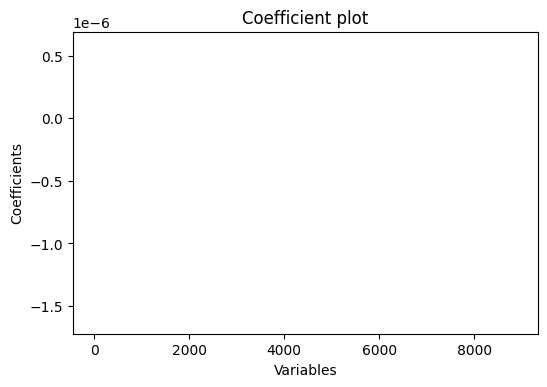

In [132]:
plt.figure(figsize=(6, 4), dpi=100, facecolor='w', edgecolor='b')  #dpi=120
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [133]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Office_PIN,1.611347e-06
1,Applicant_City_PIN,5.827497e-07
2,Manager_Grade,1.172724e-09
3,Manager_Num_Application,1.352711e-09
4,Manager_Num_Coded,1.683894e-10


In [134]:
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [135]:
subset = data[sig_var['Variable'].values]
subset.head()

""
4111
7174
419
4294
7474
